In [60]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from typing import List, Union

print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")

Numpy: 1.26.4
Matplotlib: 3.7.1


In [61]:
def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

In [62]:
def create_colorsteps(colors: np.array, N: int=256) -> np.array:
  """
  Create an equally stepped list of colors with a given number of steps.

  Parameters:
  colors: np.array of shape (N, 3) or (N, 4)
  N: int

  Returns:
  np.array of shape (N, 3) or (N, 4)
  """
  colorLen = len(colors)
  vals = np.zeros((N, colors.shape[1]))
  steps = N // colorLen

  for i in range(colorLen):
    vals[i*steps:(i+1)*steps] = colors[i]
  vals[colorLen-steps:N] = colors[-1]
  return vals

def create_colosteps_pos(colors: np.array, positions: np.array, N: int=256) -> np.array:
  """
  Create an equally stepped list of colors with a given number of steps.

  Parameters:
  colors: np.array of shape (N, 3) or (N, 4)
  """
  colorLen = len(colors)
  vals = np.zeros((N, colors.shape[1]))
  steps = map_values(positions, 0, 1, 0, N-1)

  for i in range(colorLen):
    vals[int(steps[i]):int(steps[i+1])] = colors[i]
  vals[int(steps[-1]):N] = colors[-1]
  return vals


def create_stepped_cmap(colors: np.array, color_positions: np.array=None) -> ListedColormap:
  """
  Create an equally stepped custom colormap from a list of colors.
  The positions should be between 0 and 1.
  If no positions are given, the colors will be equally stepped.
  The colors should be between 0 and 1 or in RGB or RGBA format with values between 0 and 255.
  The alpha channel is optional and can either be in the range 0-1 in any case or 0-255 as the RGB values.

  Parameters:
  colors: np.array of shape (N, 3) or (N, 4)

  Returns:
  custom_cmap: ListedColormap
  """
  if color_positions is not None:
    if np.any(color_positions < 0) or np.any(color_positions > 1):
      raise ValueError("color_positions should be between 0 and 1")
    elif len(colors)+1 != len(color_positions):
      raise ValueError("length of color_positions must be one longer than length of colors")

  if colors.shape[1] != 3 and colors.shape[1] != 4:
    raise ValueError("colors should have shape (N, 3) or (N, 4)")
  elif np.any(colors) < 0 or np.any(colors) > 255:
    raise ValueError("colors value can not be smaller then 0 and not larger than 255")

  if np.max(colors) > 1 and np.max(colors) <= 255:
    if colors.shape[1] == 4 and np.max(colors[:, 3]) > 1:
      colors = rgb_to_0to1(colors)
    elif colors.shape[1] == 4 and np.max(colors[:, 3]) <= 1:
      colors = np.concatenate((rgb_to_0to1(colors[:, :3]), colors[:, -1:]), axis=1)
    else:
      colors = rgb_to_0to1(colors)

  if color_positions is not None:
    return ListedColormap(create_colosteps_pos(colors, color_positions))
  else:
   return ListedColormap(create_colorsteps(colors))

In [63]:
def map_values(value: Union[float, np.array], old_min: float, old_max: float, new_min: float, new_max: float):
  """
  Map a value from one range to another.

  Parameters:
  value: float
  old_min: float
  old_max: float
  new_min: float
  new_max: float

  Returns:
  float
  """
  return (value - old_min) / (old_max - old_min) * (new_max - new_min) + new_min

def rgb_to_0to1(rgb: np.array) -> np.array:
  """
  Convert RGB values to 0-1 range.

  Parameters:
  rgb: np.array of shape (N, 3) or (N, 4)

  Returns:
  np.array of shape (N, 3) or (N, 4)
  """
  return rgb / 255


def rgb_to_hex(rgb: np.array) -> np.array:
  """
  Convert RGB values to hex.

  Parameters:
  rgb: np.array of shape (N, 3) or (N, 4)

  Returns:
  hex: np.array of shape (N,)
  """
  return np.array([matplotlib.colors.to_hex((r, g, b)) for r, g, b in rgb])


def create_color_gradient(colors: np.array, color_positions: np.array, t: np.array) -> np.array:
  """
  Create a gradient from a list of colors and a list of positions.
  The positions should be between 0 and 1.

  Parameters:
  colors: np.array of shape (N, 3) or (N, 4)
  color_positions: np.array of shape (N)
  t: np.array of shape (M)

  Returns:
  gradient: np.array of shape (M, 3) or (M, 4)
  """
  gradient = []
  for i in range(len(t)):
      for j in range(len(colors) - 1):
          if color_positions[j] <= t[i] <= color_positions[j + 1]:
              color = colors[j] + (colors[j + 1] - colors[j]) * (
                  (t[i] - color_positions[j])
                  / (color_positions[j + 1] - color_positions[j])
              )
              gradient.append(color)
              break
  return gradient

def create_gradient_cmap(colors: np.array, color_positions: np.array) -> ListedColormap:
  """
  Create a custom colormap from a list of colors and a list of positions.
  The positions should be between 0 and 1.
  The colors should be between 0 and 1 or in RGB or RGBA format with values between 0 and 255.
  The alpha channel is optional and can either be in the range 0-1 in any case or 0-255 as the RGB values.

  Parameters:
  colors: np.array of shape (N, 3) or (N, 4)
  color_positions: np.array of shape (N)

  Returns:
  custom_cmap: ListedColormap
  """
  if np.any(color_positions < 0) or np.any(color_positions > 1):
    raise ValueError("color_positions should be between 0 and 1")
  elif len(colors) != len(color_positions):
    raise ValueError("colors and color_positions should have the same length")
  elif colors.shape[1] != 3 and colors.shape[1] != 4:
    raise ValueError("colors should have shape (N, 3) or (N, 4)")
  elif np.any(colors) < 0 or np.any(colors) > 255:
    raise ValueError("colors value can not be smaller then 0 and not largern than 255")

  if np.max(colors) > 1 and np.max(colors) <= 255:
    if colors.shape[1] == 4 and np.max(colors[:, 3]) > 1:
      colors = rgb_to_0to1(colors)
    elif colors.shape[1] == 4 and np.max(colors[:, 3]) <= 1:
      colors = np.concatenate((rgb_to_0to1(colors[:, :3]), colors[:, -1:]), axis=1)
    else:
      colors = rgb_to_0to1(colors)


  return ListedColormap(create_color_gradient(colors, color_positions, np.linspace(0, 1, 255)))

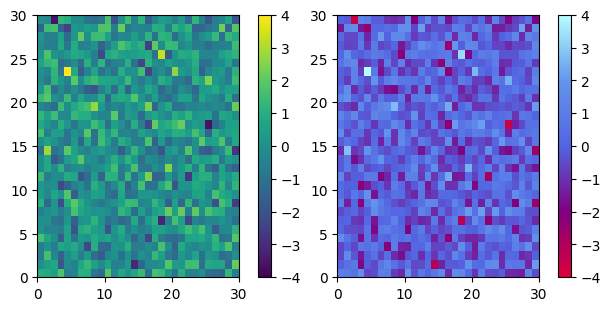

In [64]:
colors_vis = np.array([[220, 0, 59], [128, 0, 128], [83, 100, 225], [99, 149, 236], [181, 255, 255]])
positions_vis = np.array([0.0, 0.25, 0.5, 0.75, 1])

customcmp_vis = create_gradient_cmap(colors_vis, positions_vis)
plot_examples([plt.colormaps["viridis"], customcmp_vis])

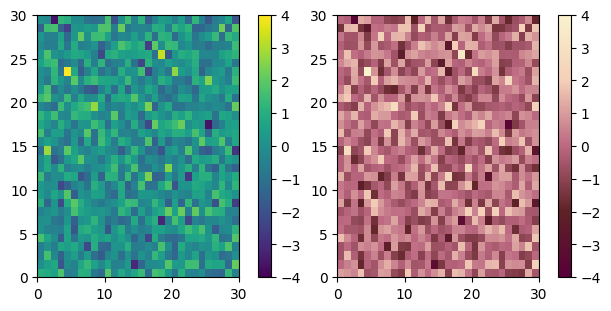

In [65]:
colors_con = np.array([[88, 0, 57], [94, 34, 38], [187, 104, 129], [244, 207, 184], [249, 243, 205]])
positions_con = np.array([0, 0.25, 0.5, 0.75, 1])

customcmp_con = create_gradient_cmap(colors_con, positions_con)
plot_examples([plt.colormaps["viridis"], customcmp_con])

In [66]:
colors_fvis = np.array([[255, 128, 0], [255, 255, 0], [150, 207, 10], [66, 160, 14]])
positions_fvis = np.array([0, 0.33, 0.66, 1])

colors_fvis = rgb_to_0to1(colors_fvis)

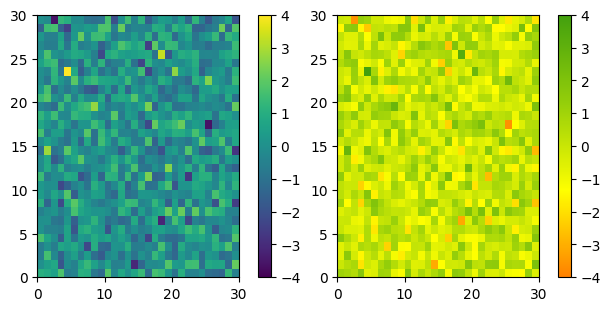

In [67]:
customcmp_fvis = LinearSegmentedColormap.from_list('custom', [
    (positions_fvis[0], colors_fvis[0]),
    (positions_fvis[1], colors_fvis[1]),
    (positions_fvis[2], colors_fvis[2]),
    (positions_fvis[3], colors_fvis[3]),
], N=256)
plot_examples([plt.colormaps["viridis"], customcmp_fvis])

In [68]:
colors_sdf = np.array([[255, 255, 102], [255, 178, 102], [163, 163, 163]])
positions_sdf = np.array([0, 0.5, 1])

hexColors_sdf = rgb_to_hex(rgb_to_0to1(colors_sdf))

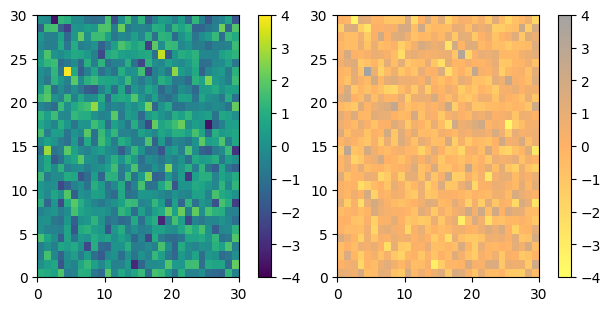

In [69]:
customcmp_hex_sdf = LinearSegmentedColormap.from_list('custom', [
    (0, hexColors_sdf[0]),
    (0.5, hexColors_sdf[1]),
    (1, hexColors_sdf[2]),
], N=256)
plot_examples([plt.colormaps["viridis"], customcmp_hex_sdf])

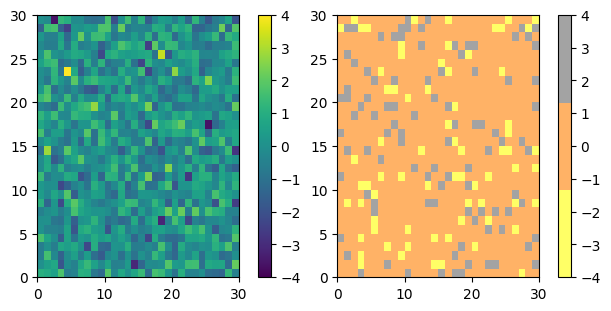

In [70]:
steps = np.array([0, 0.25, 0.75, 1])
colors_dclasses = np.array([[255, 255, 102], [255, 178, 102], [163, 163, 163]])

steppedcmp = create_stepped_cmap(colors_dclasses)
plot_examples([plt.colormaps["viridis"], steppedcmp])

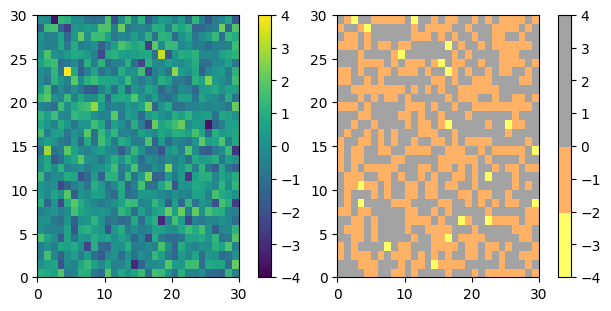

In [71]:
steps = np.array([0, 0.25, 0.5, 1])
colors_dclasses = np.array([[255, 255, 102], [255, 178, 102], [163, 163, 163]])

steppedcmp = create_stepped_cmap(colors_dclasses, steps)
plot_examples([plt.colormaps["viridis"], steppedcmp])